In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import Ridge,Lasso,ElasticNet 
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
video_info=pd.read_csv('/Users/paxton615/GA/DSI9-lessons/projects/video_info_2.csv')

In [3]:
def data_glimps(dataset):    
    print("Shape:",dataset.shape,"\n")
    print("Types:\n",dataset.dtypes,"\n")
    print("isnull:\n",dataset.isnull().sum(),"\n")
    print("Columns_names:\n",dataset.columns,"\n")
    
    fig,ax = plt.subplots(figsize=(9,7),squeeze=True)
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=13,rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=13,rotation=30)
    sns.heatmap(dataset.corr(),vmin=-1, vmax=1, mask=mask, annot=True,ax=ax)
    plt.show()
    "\n"
    set_option('precision',5)

    display(dataset.describe())
    display(dataset.head())
    display(dataset.tail())

# The dataset video_info contains all valuable information regarding to
# videos, both self-made by Linguapal and collected from other sources.

# The target is to find what kind of videos are more favorable by users. 

# As part of Liguapal management team, we believe that if a user hits favorite button or even comment on an video, she or he will be deemed as in favor of that video.

# 1. Final check on  the dataset

Shape: (3226, 11) 

Types:
 Unnamed: 0          int64
video_id          float64
play_duration     float64
title              object
video_length      float64
access_times      float64
popularity        float64
favorite_times    float64
complete_rate     float64
catagory          float64
comment_counts    float64
dtype: object 

isnull:
 Unnamed: 0        0
video_id          1
play_duration     1
title             1
video_length      1
access_times      1
popularity        1
favorite_times    1
complete_rate     1
catagory          0
comment_counts    0
dtype: int64 

Columns_names:
 Index(['Unnamed: 0', 'video_id', 'play_duration', 'title', 'video_length',
       'access_times', 'popularity', 'favorite_times', 'complete_rate',
       'catagory', 'comment_counts'],
      dtype='object') 



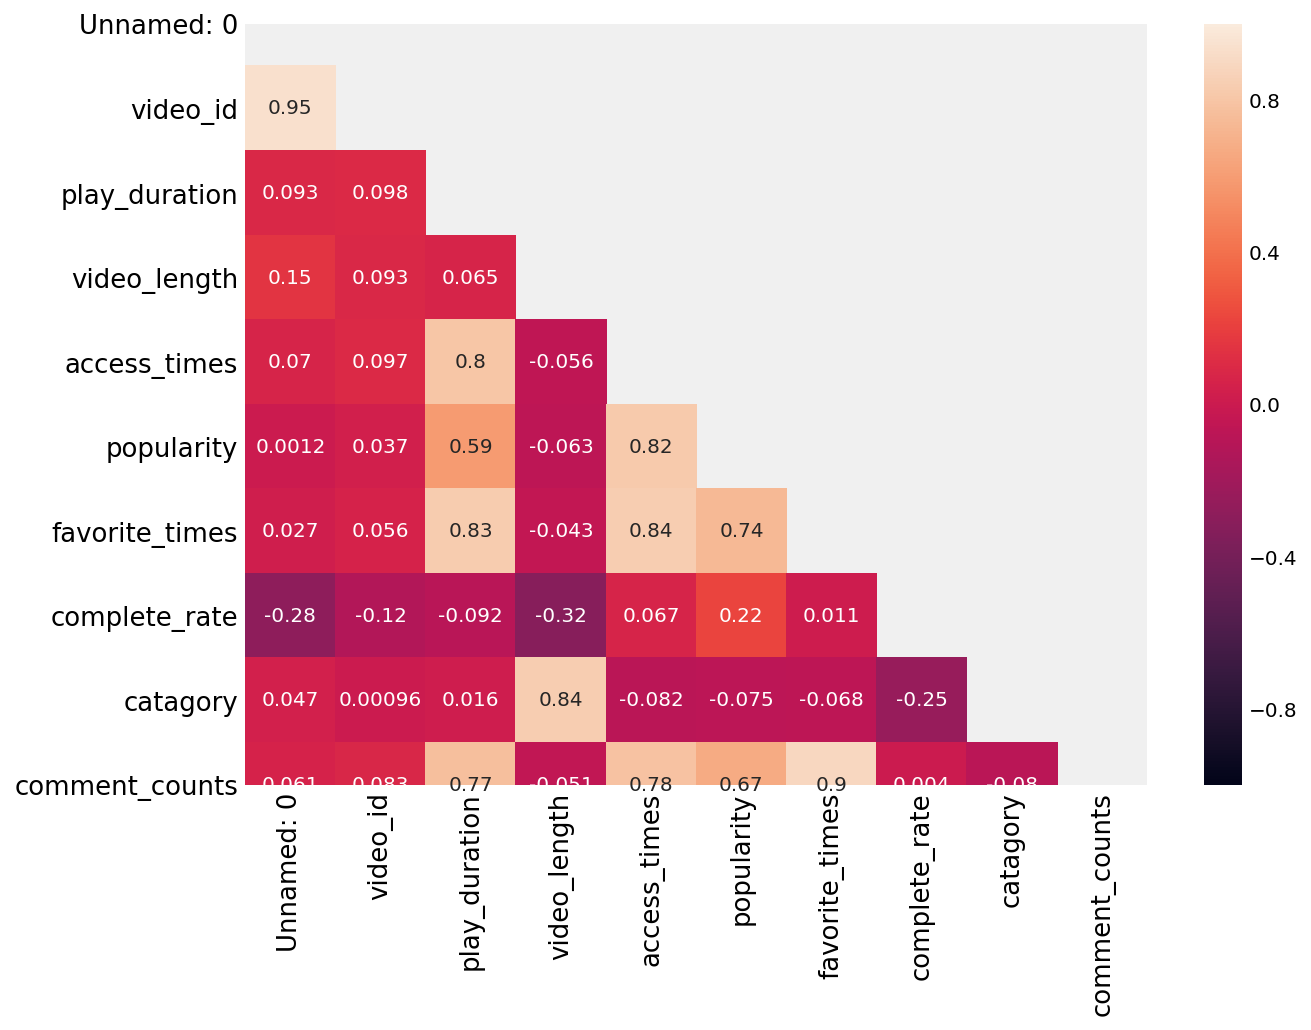

,Unnamed: 0,video_id,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
count,3226.00000,3225.00000,3.22500e+03,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000,3226.00000,3226.00000
mean,1612.50000,8244.84496,7.86000e+04,222.22078,7115.10698,724.32511,77.28899,0.15022,1.15592,4.96311
std,931.41031,3700.77757,2.14105e+05,518.56171,18776.04764,2543.35685,281.39888,0.10755,0.45531,14.37848
min,0.00000,187.00000,6.00000e+00,3.00000,7.00000,0.12500,0.00000,0.00043,1.00000,0.00000
25%,806.25000,5766.00000,4.83000e+03,27.00000,647.00000,51.81700,5.00000,0.06952,1.00000,0.00000
50%,1612.50000,9300.00000,2.88950e+04,106.00000,2759.00000,173.15500,21.00000,0.11903,1.00000,2.00000
75%,2418.75000,10133.00000,7.85550e+04,188.00000,6200.00000,474.61900,59.00000,0.20943,1.00000,5.00000
max,3225.00000,15130.00000,5.87947e+06,5452.00000,385368.00000,82040.25000,8607.00000,1.04768,3.00000,525.00000


,Unnamed: 0,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
0,0,187.0,2216.0,【自制】吓坏老外的高考,123.0,701.0,15.687,3.0,0.02570,1.0,0.0
1,1,197.0,1322.0,四级考前必背100词-3,1060.0,218.0,1.747,0.0,0.00572,2.0,0.0
2,2,198.0,887.0,四级考前必背100词-4,961.0,232.0,1.052,0.0,0.00398,2.0,0.0
3,3,200.0,174109.0,占据高频考点的社会单词,1627.0,2235.0,120.498,26.0,0.04788,2.0,1.0
4,4,203.0,2706.0,【自制】走过最长的路就是网购折扣中的套路,107.0,470.0,76.547,4.0,0.05381,1.0,0.0


,Unnamed: 0,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
3221,3221,15127.0,120283.0,被最毒的蜘蛛咬伤怎么办？,108.0,14355.0,689.303,75.0,0.07758,1.0,5.0
3222,3222,15128.0,200051.0,可爱小孩回答什么是爱？,130.0,19129.0,1027.842,151.0,0.08045,1.0,11.0
3223,3223,15129.0,175182.0,一枚回形针,55.0,46162.0,1887.447,157.0,0.06900,1.0,8.0
3224,3224,15130.0,246616.0,怎么和宝宝乘飞机？,110.0,24483.0,1268.913,98.0,0.09157,1.0,4.0
3225,3225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0


In [4]:
data_glimps(video_info) 

In [5]:
# dropna
video_info.dropna(inplace=True)

In [6]:
# keep an original copy
video_info_copy=video_info.copy()

In [7]:
video_info.columns

Index(['Unnamed: 0', 'video_id', 'play_duration', 'title', 'video_length',
       'access_times', 'popularity', 'favorite_times', 'complete_rate',
       'catagory', 'comment_counts'],
      dtype='object')

In [8]:
# don't need col 'Unnamed:0' and 'title' for now
video_info = video_info[['video_id', 'play_duration', 'video_length',
       'access_times', 'popularity', 'favorite_times', 'complete_rate',
       'catagory', 'comment_counts']]

In [9]:
# reset index with 'video_id'
video_info.set_index('video_id',drop=True,inplace=True)

# 2. Descriptive Statistics

Shape: (3225, 8) 

Types:
 play_duration     float64
video_length      float64
access_times      float64
popularity        float64
favorite_times    float64
complete_rate     float64
catagory          float64
comment_counts    float64
dtype: object 

isnull:
 play_duration     0
video_length      0
access_times      0
popularity        0
favorite_times    0
complete_rate     0
catagory          0
comment_counts    0
dtype: int64 

Columns_names:
 Index(['play_duration', 'video_length', 'access_times', 'popularity',
       'favorite_times', 'complete_rate', 'catagory', 'comment_counts'],
      dtype='object') 



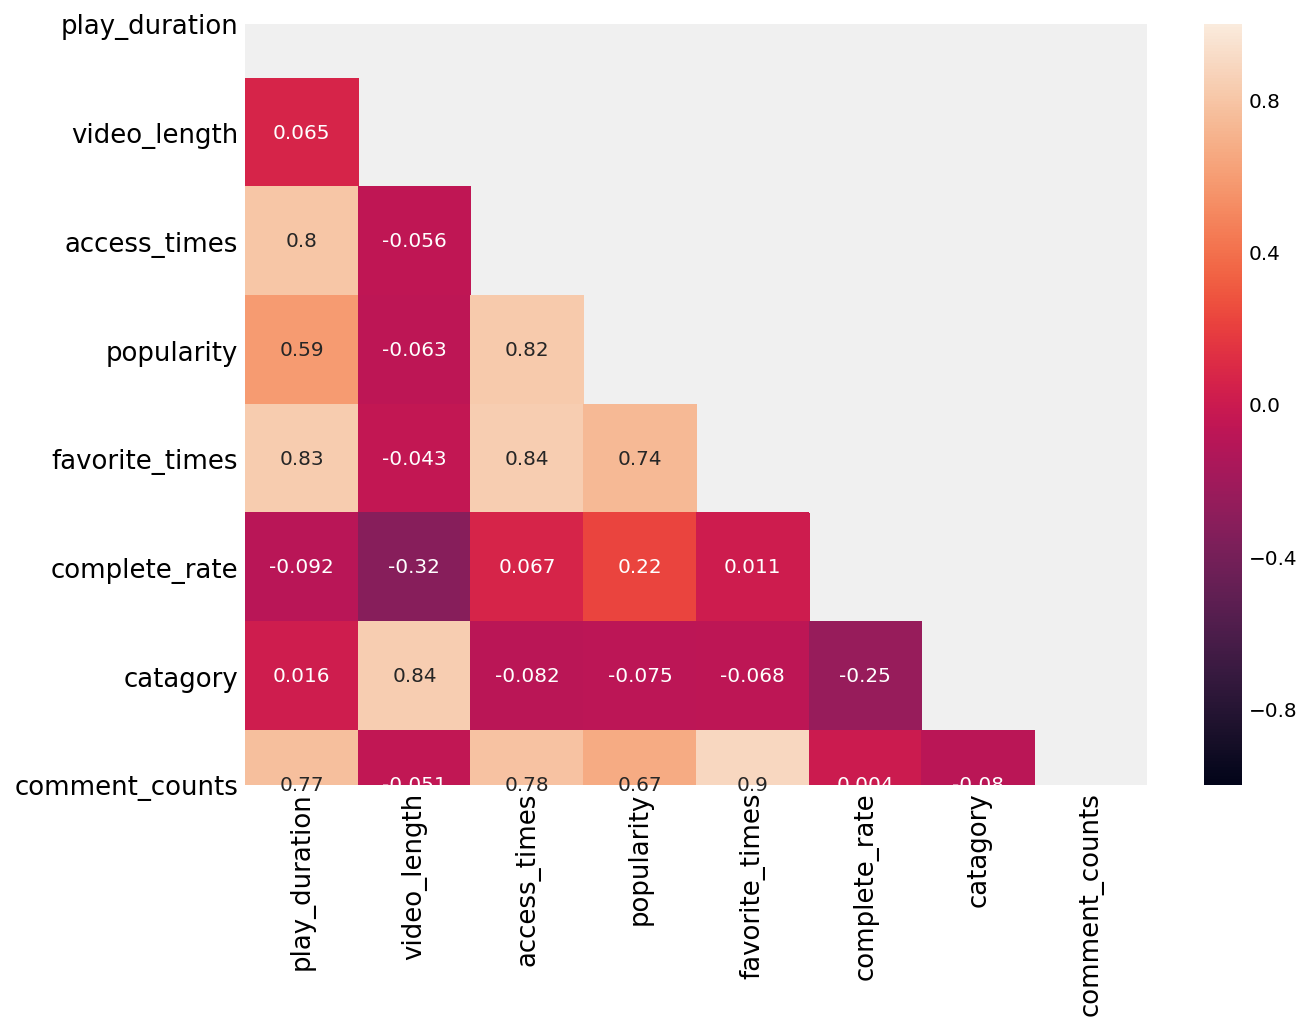

,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
count,3.22500e+03,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000
mean,7.86000e+04,222.22078,7115.10698,724.32511,77.28899,0.15022,1.15566,4.96465
std,2.14105e+05,518.56171,18776.04764,2543.35685,281.39888,0.10755,0.45514,14.38044
min,6.00000e+00,3.00000,7.00000,0.12500,0.00000,0.00043,1.00000,0.00000
25%,4.83000e+03,27.00000,647.00000,51.81700,5.00000,0.06952,1.00000,0.00000
50%,2.88950e+04,106.00000,2759.00000,173.15500,21.00000,0.11903,1.00000,2.00000
75%,7.85550e+04,188.00000,6200.00000,474.61900,59.00000,0.20943,1.00000,5.00000
max,5.87947e+06,5452.00000,385368.00000,82040.25000,8607.00000,1.04768,3.00000,525.00000


,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
video_id,,,,,,,,
187.0,2216.0,123.0,701.0,15.687,3.0,0.02570,1.0,0.0
197.0,1322.0,1060.0,218.0,1.747,0.0,0.00572,2.0,0.0
198.0,887.0,961.0,232.0,1.052,0.0,0.00398,2.0,0.0
200.0,174109.0,1627.0,2235.0,120.498,26.0,0.04788,2.0,1.0
203.0,2706.0,107.0,470.0,76.547,4.0,0.05381,1.0,0.0


,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
video_id,,,,,,,,
15126.0,232014.0,114.0,25769.0,2769.835,329.0,0.07898,1.0,18.0
15127.0,120283.0,108.0,14355.0,689.303,75.0,0.07758,1.0,5.0
15128.0,200051.0,130.0,19129.0,1027.842,151.0,0.08045,1.0,11.0
15129.0,175182.0,55.0,46162.0,1887.447,157.0,0.06900,1.0,8.0
15130.0,246616.0,110.0,24483.0,1268.913,98.0,0.09157,1.0,4.0


In [10]:
data_glimps(video_info)

In [11]:
# Highly corelated cols :'play_duration', 'access_times', 'popularity', 'favorite_times',  'comment_counts'
# 

# 3.Visualizations

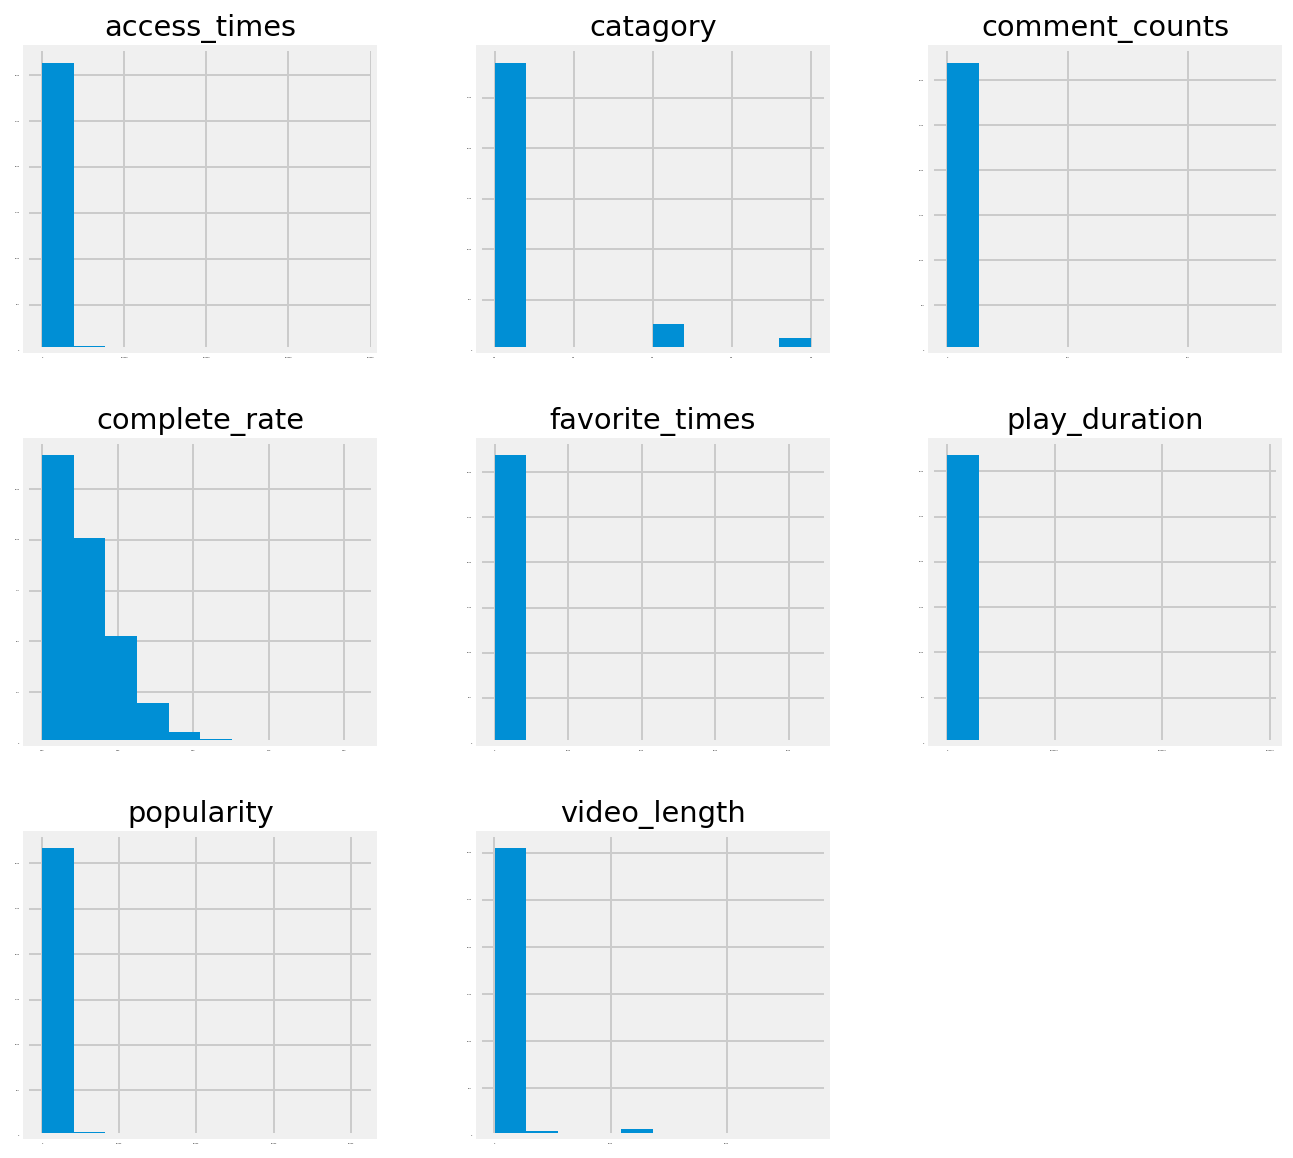

In [12]:
video_info.hist(sharex=False,figsize=(10,10),sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

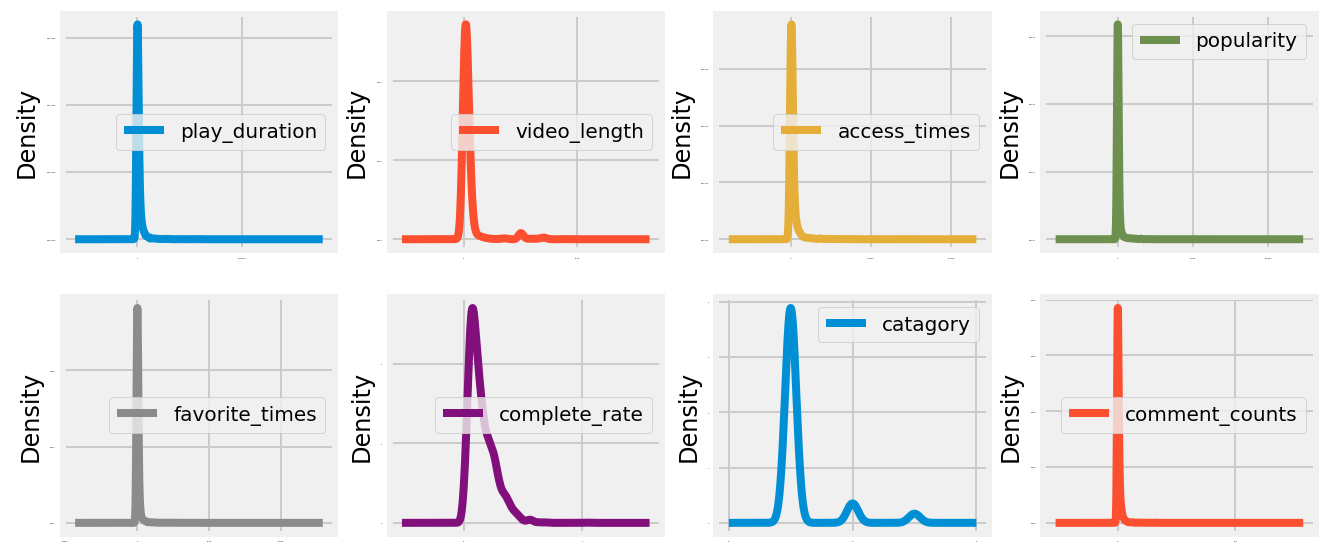

In [13]:
video_info.plot(kind='density',figsize=(10,10), subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1)
plt.show()

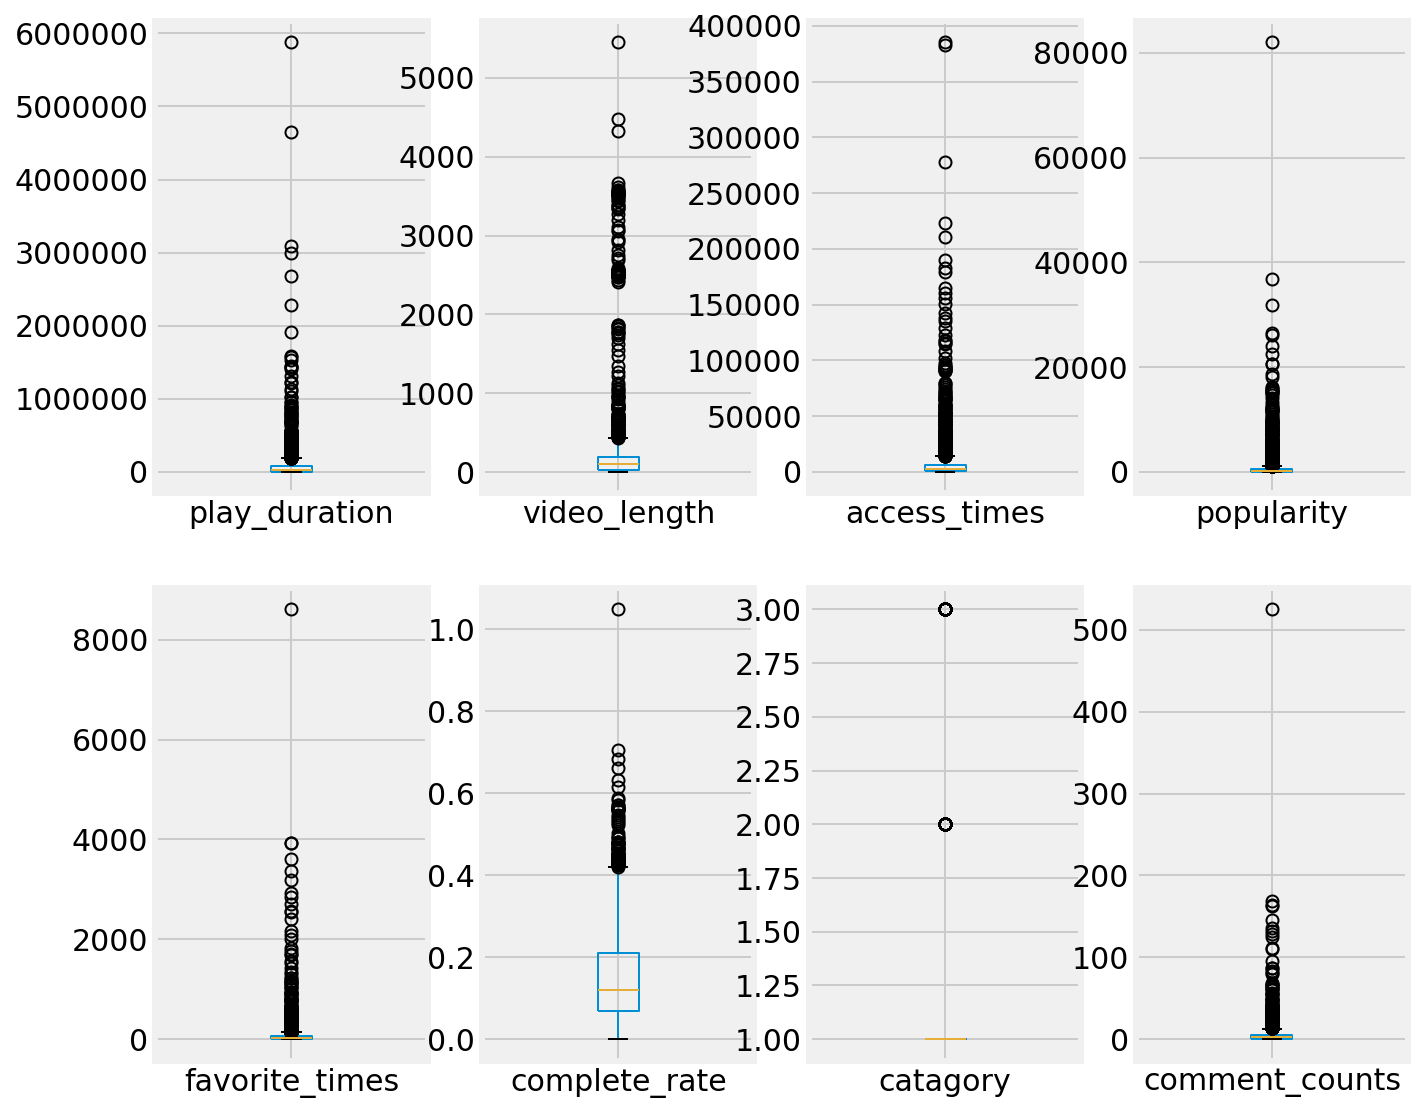

In [14]:
video_info.plot(kind='box',figsize=(10,20),  subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=15)
plt.show()

In [15]:
# dataset is not in the best desirable shapes...

# 4.Validation Dataset

In [16]:
video_info.head()

,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
video_id,,,,,,,,
187.0,2216.0,123.0,701.0,15.687,3.0,0.02570,1.0,0.0
197.0,1322.0,1060.0,218.0,1.747,0.0,0.00572,2.0,0.0
198.0,887.0,961.0,232.0,1.052,0.0,0.00398,2.0,0.0
200.0,174109.0,1627.0,2235.0,120.498,26.0,0.04788,2.0,1.0
203.0,2706.0,107.0,470.0,76.547,4.0,0.05381,1.0,0.0


In [17]:
y = video_info.copy().pop('comment_counts')

In [18]:
X = video_info[[ 'play_duration', 'video_length',
       'access_times', 'popularity', 'favorite_times', 'complete_rate',
       'catagory']]

In [19]:
X.head()

,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory
video_id,,,,,,,
187.0,2216.0,123.0,701.0,15.687,3.0,0.02570,1.0
197.0,1322.0,1060.0,218.0,1.747,0.0,0.00572,2.0
198.0,887.0,961.0,232.0,1.052,0.0,0.00398,2.0
200.0,174109.0,1627.0,2235.0,120.498,26.0,0.04788,2.0
203.0,2706.0,107.0,470.0,76.547,4.0,0.05381,1.0


In [20]:
validation_size=0.2
seed = 7

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
        test_size=validation_size, random_state=seed)

# 5.Evaluate Algorithms: Baseline

In [22]:
num_folds = 10
scoring='neg_mean_squared_error'

In [23]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [24]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed)
    cv_results=cross_val_score(model, X_train, y_train, 
                               cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -58.110531 (66.301453)
LASSO: -57.961752 (65.808384)
EN: -57.946437 (65.751892)
KNN: -128.434109 (224.158799)
CART: -125.737984 (214.183814)
SVR: -240.973765 (350.952482)


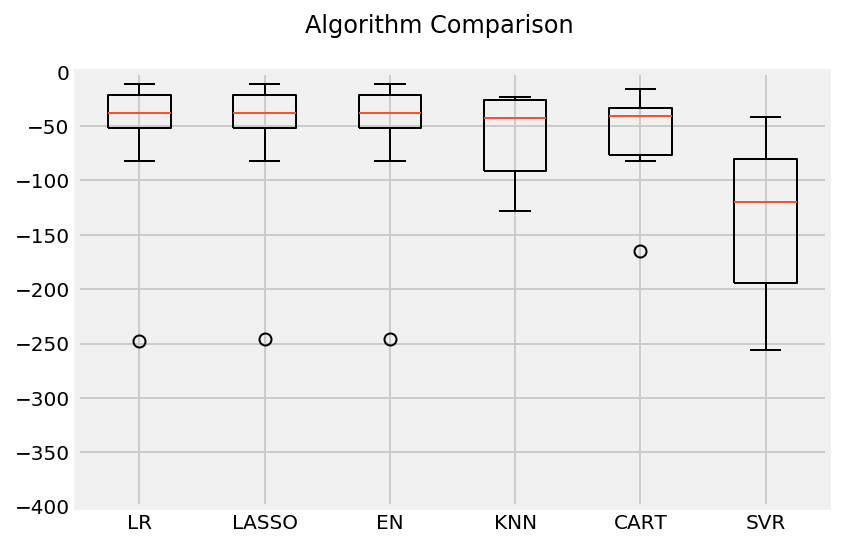

In [25]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(-400,0,10)
plt.show()

# 6.Evaluate Algorithms: Standardization

In [26]:
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler',StandardScaler()),
                ('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),
                 ('LASSO', Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),
                ('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),
                ('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),
                ('CART', DecisionTreeRegressor() )])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),
                ('SVR',SVR())])))

In [27]:
results = []
names = []
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -58.110531 (66.301453)
ScaledLASSO: -59.505761 (82.786744)
ScaledEN: -72.419210 (122.445351)
ScaledKNN: -102.113938 (214.887837)
ScaledCART: -116.391473 (194.733268)
ScaledSVR: -188.831504 (336.802441)


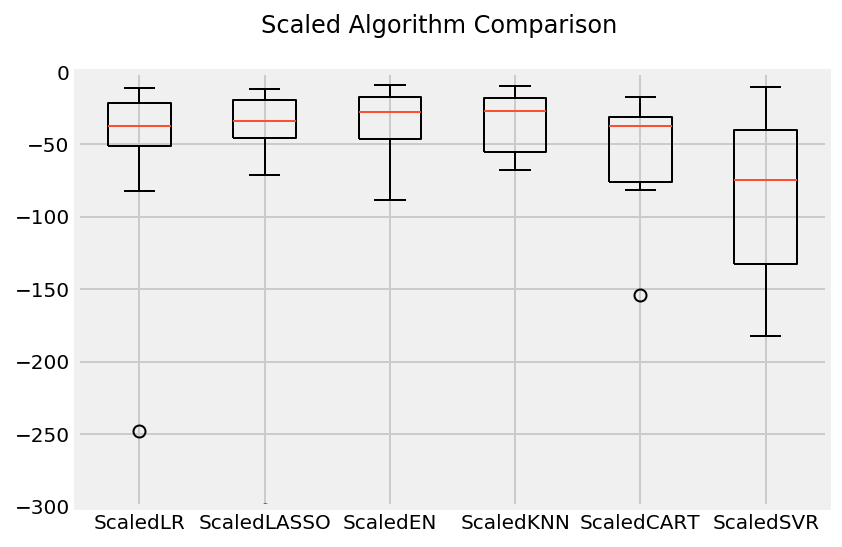

In [28]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(-300,0,10)
plt.show()

# 7.Improve Results With GridSearchCV

In [29]:
# improve results with tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [30]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model= LinearRegression()
kfold=KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX,y_train)

In [31]:
print("Best: %f using %s" % (grid_result.best_score_, 
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -58.110531 using {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-58.110531 (66.301453) with: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
-58.110531 (66.301453) with: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-83.744810 (71.261804) with: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
-83.744810 (71.261804) with: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
-58.110531 (66.301453) with: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
-58.110531 (66.301453) with: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
-83.744810 (71.261804) with: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
-83.744810 (71.261804) with: {'copy_X': False, 'fit_intercept': False, 'normalize': False}


# 8.Ensemble Methods

In [32]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),
            ('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),
                ('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),
                ('RF',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor(n_estimators=10))])))
results=[]
names=[]
for name,model in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
                                scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -108.943508 (191.080382)
ScaledGBM: -107.492348 (204.323150)
ScaledRF: -113.755233 (217.785949)
ScaledET: -128.437171 (232.968725)


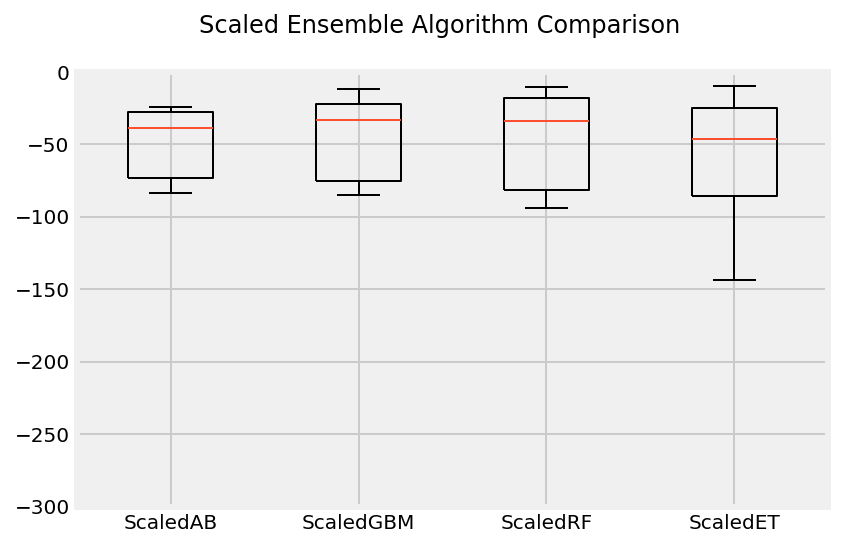

In [33]:
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(-300,0,10)
plt.show()

In [34]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid_1 = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
gred = GridSearchCV(estimator=model, param_grid=param_grid_1,
                   scoring=scoring, cv=kfold, iid=True)
grid_result = grid.fit(rescaledX, y_train)

In [35]:
print("Best: %f using %s" % (grid_result.best_score_,
        grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -58.110531 using {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-58.110531 (66.301453) with: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
-58.110531 (66.301453) with: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-83.744810 (71.261804) with: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
-83.744810 (71.261804) with: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
-58.110531 (66.301453) with: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
-58.110531 (66.301453) with: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
-83.744810 (71.261804) with: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
-83.744810 (71.261804) with: {'copy_X': False, 'fit_intercept': False, 'normalize': False}


# 9.Finalize Model

In [36]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,
            n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
rescaleValidationX = scaler.transform(X_test)
predictions = model.predict(rescaleValidationX)
print(mean_squared_error(y_test, predictions))

101.21688996925741


In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LinearRegression(copy_X= True, fit_intercept= True, normalize= False)
model.fit(rescaledX, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
rescaleValidationX = scaler.transform(X_test)
predictions = model.predict(rescaleValidationX)
print(mean_squared_error(y_test, predictions))
print(model.score(rescaledX,y_train))
print(model.score(rescaleValidationX,y_test))

39.287941784294674
0.8229732310393485
0.6504163819557776


In [40]:
# LR is the best model among all the models

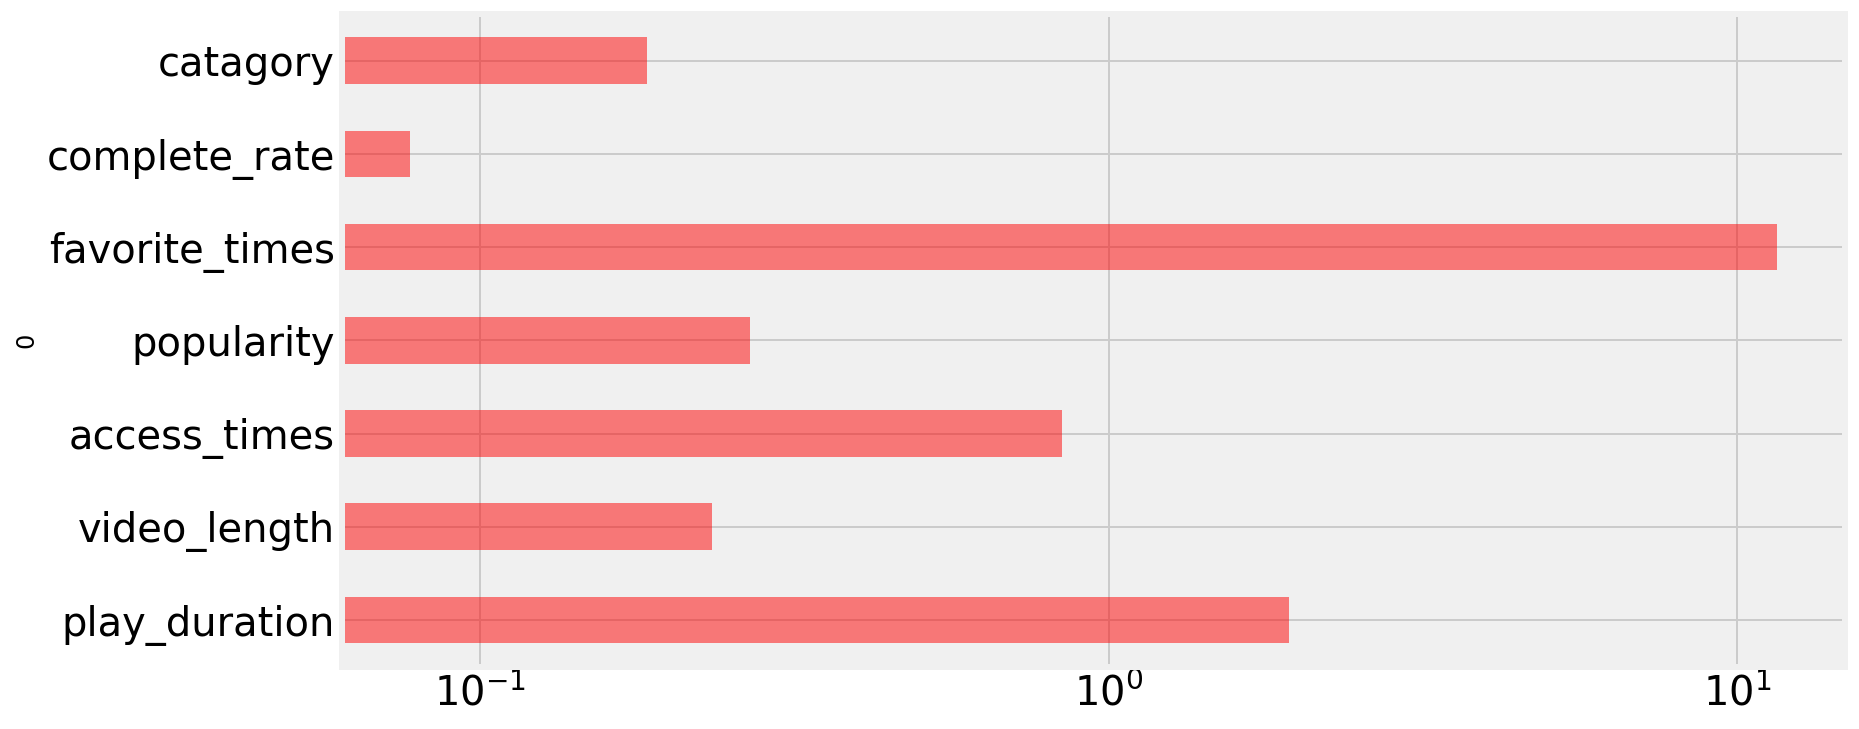

In [44]:
pd.DataFrame(list(zip(X_train.columns,np.abs(model.coef_)))
            ).plot(kind='barh',x=0,y=1,figsize=(12,6),color='red',alpha=0.5,fontsize=20,legend=False)
plt.xscale('log')
plt.show()